## Machine Intelligenc: Exercise sheet 7
Belugas on the Run

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement as CWR
from itertools import product
import matplotlib

In [130]:
#Adjusting matplotlib settings:

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams['axes.prop_cycle']= \
matplotlib.cycler(color=['firebrick', \
                         'tomato', 'coral', \
                        'steelblue','skyblue', 'silver',\
                        'gainsboro', 'whitesmoke'])

$\textbf{Exercise 1: Simulated Annealing}$

In [319]:
#Global variables:
states = [-1,1]
N = 6
tmax = 150
beta = 1.01

#Generate a set of all possible states:
possible_states = np.array(list(product(states,repeat=6)))


#Calculate energy:

def energy(W: np.ndarray, s: np.ndarray):
    
    energ = np.array([W[i,j] * s[i] * s[j] for i in range(N) for j in range(N)])
    
    return -.5*energ.sum()

#For plotting in 2(c) use random matrix:

wInit = np.random.uniform(-.5,5, (6,6))
sInit = np.random.choice(states, 6)

#For plotting in 2(c) use random matrix:
energyPartial = lambda s: energy(wInit,s)
energies = [energyPartial(row) for row in possible_states]

#Calculate partion function:
temp = np.array([np.exp(-beta*energ) for energ in energies])
Z = temp.sum()
Probs = 1/Z*temp #Probabilities for plotting

#Sanity check:
assert(Probs.sum()==1.0)

$\textbf{Part A: Initialization (+ Optimization)}$

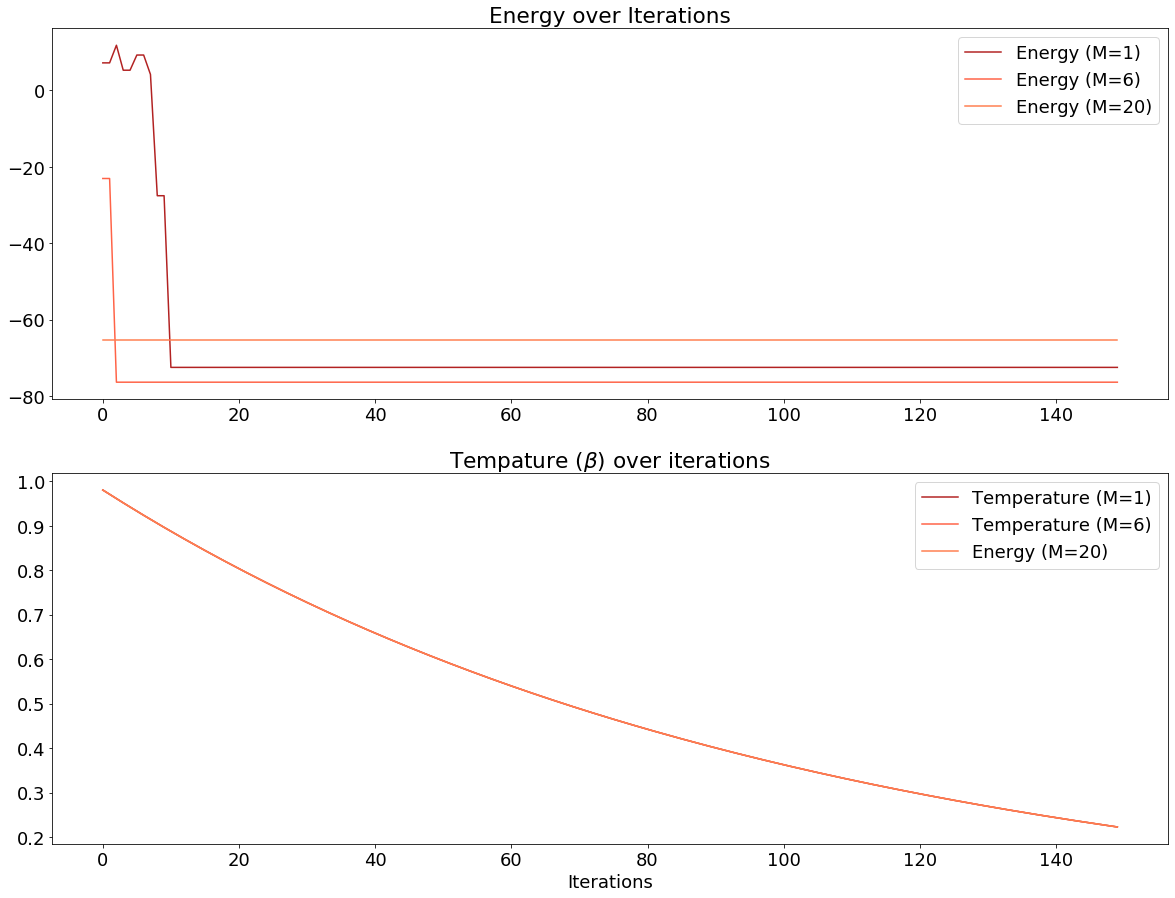

In [329]:
M1, M2, M3 = (1,6,20)

def simAnneal(M):

    sInit = np.random.choice(states, 6)
    bInit = 1.01
    tau = 1.01
    
    
    #Generate symmetric weight matrix with 0 diagonal:
    wInit = np.random.uniform(-.5,5, (6,6))
    wInit += wInit.T
    np.fill_diagonal(wInit,0)
    
    iteration = 0
    s,W, beta = sInit, wInit, bInit
    energies = np.zeros(tmax)
    temperatures = np.zeros(tmax)
    
    
    while iteration < tmax:
        
        for count in range(M):
        
            flipped = False
            node = np.random.choice([0,1,2,3,4,5])
            node_energy = -.5*W[node,:] @  (s[node] * s)
            #Compute DeltaE:
            deltaE = -2*node_energy
        
            #Flip the state:
            flipProb = 1 / (1 + np.exp(beta * deltaE))
            randNum = np.random.uniform()
    
            if randNum < flipProb:
                s[node] = -s[node]
                flipped = True
                
        beta = beta * tau
        energies[iteration] = energy(W,s)
        temperatures[iteration] = 1 / beta
        iteration += 1
        
    return energies, temperatures

energies1, temperatures1 = simAnneal(M1)
energies2, temperatures2 = simAnneal(M2)
energies3, temperatures3 = simAnneal(M3)


fig, axs = plt.subplots(2,1, figsize = (20,15))

axs[0].plot(energies1, label = 'Energy (M={})'.format(M1))
axs[0].plot(energies2, label = 'Energy (M={})'.format(M2))
axs[0].plot(energies3, label = 'Energy (M={})'.format(M3))
axs[0].set_title('Energy over Iterations')
axs[1].plot(temperatures1, label = 'Temperature (M={})'.format(M1))
axs[1].plot(temperatures2, label = 'Temperature (M={})'.format(M2))
axs[1].plot(temperatures3, label = 'Energy (M={})'.format(M3))
axs[1].set_title(r'Tempature ($\beta$) over iterations')
axs[1].set_xlabel('Iterations')
axs[0].legend()
axs[1].legend()

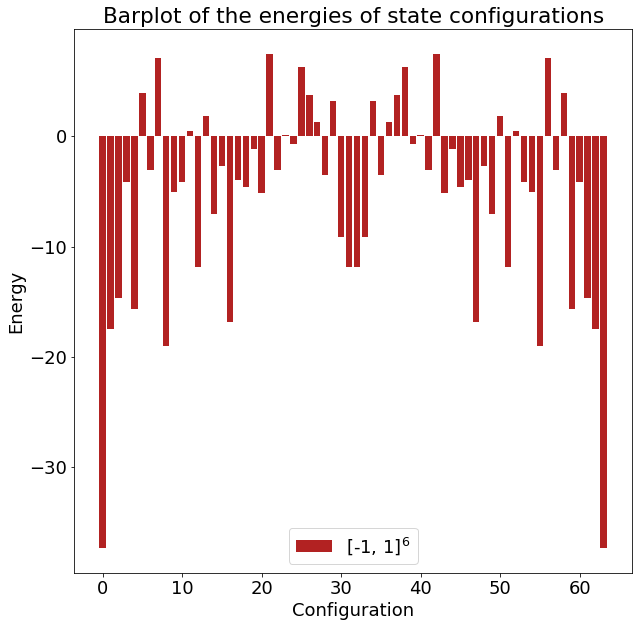

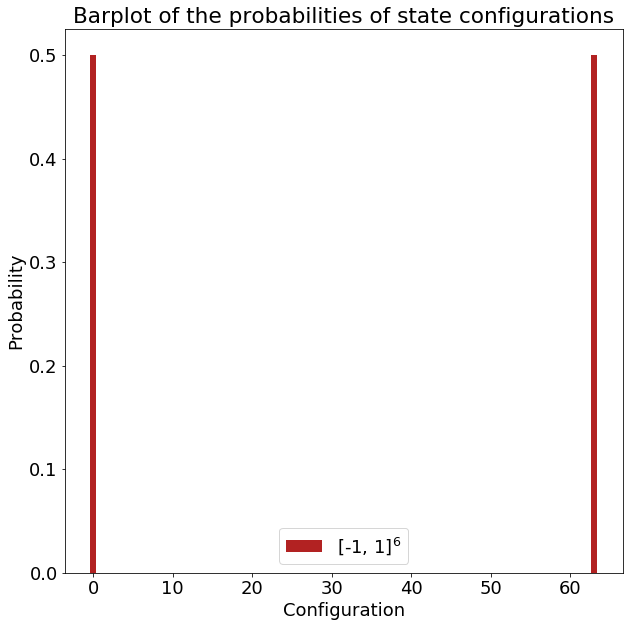

In [321]:
plt.figure(figsize=(10,10))

plt.title('Barplot of the energies of state configurations')
plt.xlabel('Configuration')
plt.ylabel('Energy')
plt.bar(list(range(64)), energies, label = r'{}$^6$'.format(states))
plt.legend()

plt.figure(figsize=(10,10))
plt.title('Barplot of the probabilities of state configurations')
plt.xlabel('Configuration')
plt.ylabel('Probability')
plt.bar(list(range(64)), Probs, label = r'{}$^6$'.format(states))
plt.legend()


$\textbf{Summary:}$ Since the network is a fully connected network, the energy is minimal whenever all $s_i$ have the same sign, which is why there are two global attractors (these are the first- and lastmost bars in the barplots above; the second plot shows they each have probability 50%). The states with poistive energy are those with an equal number of negative and positive entries, of which there are exactly 20, which is also what we see in the plot. Once the attractor states are reached, the energy no longer changes, which can be seen above. Increasing $M$ increases the probability of flipping each $s_i$ in one iteration, so that one of the attractors can be reached in one go, which is why the energy doesn't change at all for large $M$ (we neglect the energy calculated just after initialization). 

$\textbf{Exercise 2: Mean-field Annealing}$

In [446]:
eps = 10e-3 #cut-off criterion 

def meanfieldAnneal():
    
    sInit = np.random.choice(states, 6)
    bInit = 1.25
    tau = 1.01
    
    #Generate symmetric weight matrix with 0 diagonal:
    wInit = np.random.uniform(-.5,5, (6,6))
    wInit += wInit.T
    np.fill_diagonal(wInit,0)
    
    iteration = 0
    s_new, W, beta = sInit, wInit, bInit
    energies = []
    temperatures = []
    
    getMeanField = lambda s: -np.array([W[row,:] @ s for row in range(6)])
    
    eInit = getMeanField(s_new)
    eNew = eInit
    eOld = np.ones(6)*1000
    iteration = 1000
    
    while np.linalg.norm(np.abs(eNew)-np.abs(eOld)) > eps:
        #Using the abs, because otherwise there were some infinite
        #loops in which the sign s -> -s -> s
        
        s = s_new.copy()
        eOld = getMeanField(s)
        s_new = np.array([np.tanh(-beta*eI) for eI in eOld])
        print(s_new)
        eNew = getMeanField(s_new)
        beta *= tau
        energies.append(energy(W,s_new))
        temperatures.append(1/beta)
        iteration -= 1
        
    return energies, temperatures


energiesMF, temperaturesMF = meanfieldAnneal()      
        

[-1.         -0.81510443 -0.9999977   0.99999999 -0.99999637  0.99917914]
[-0.99962635  0.81616456  0.8821487  -1.         -0.9999126  -1.        ]
[-0.95679353 -1.         -1.         -0.01181712 -0.62908446 -0.9760233 ]
[-1. -1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1. -1.]


$\textbf{Part C: Visualization}$

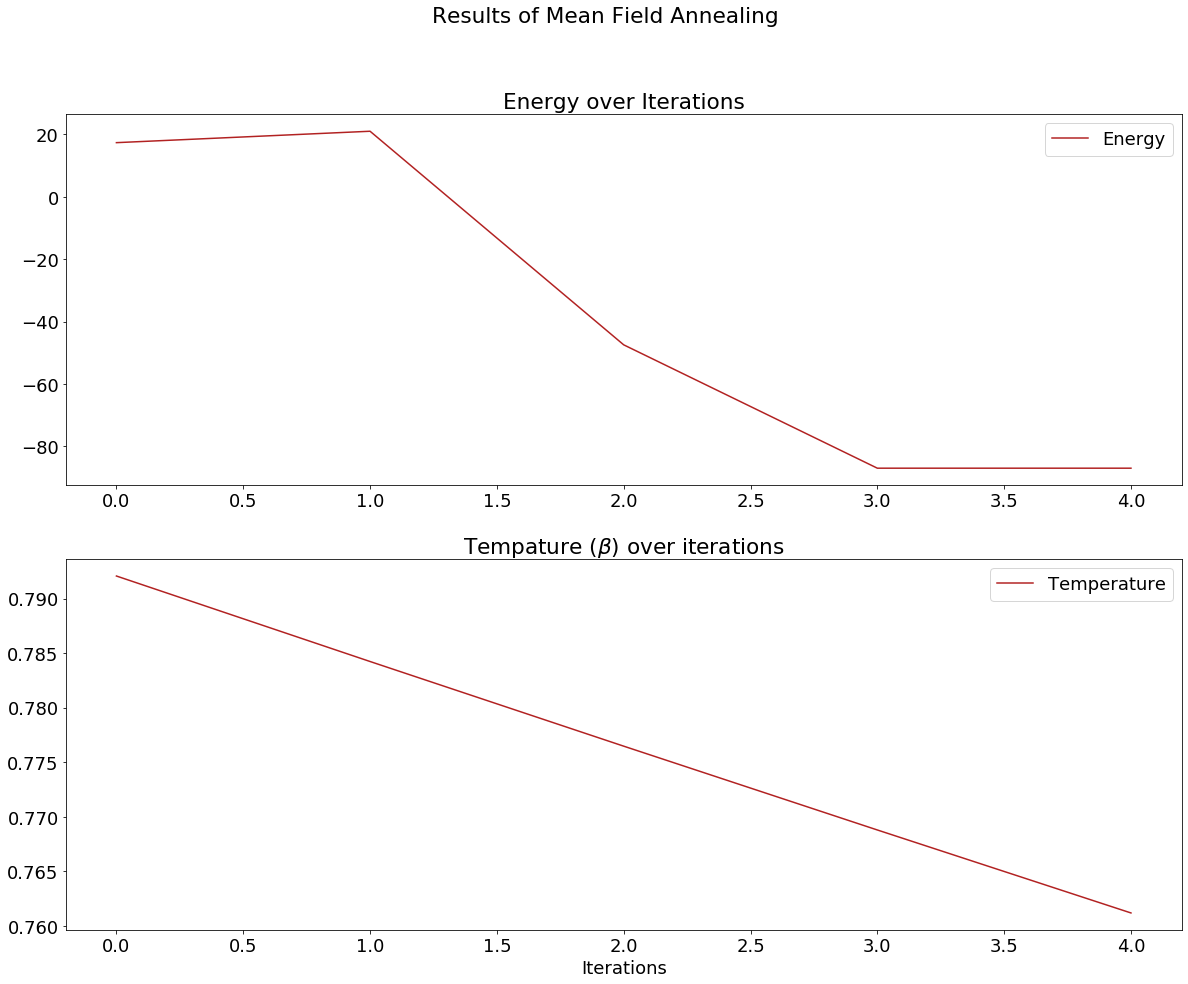

In [447]:
fig, axs = plt.subplots(2,1, figsize = (20,15))

plt.suptitle('Results of Mean Field Annealing')

axs[0].plot(energiesMF, label = 'Energy')
axs[0].set_title('Energy over Iterations')
axs[1].plot(temperaturesMF, label = 'Temperature')
axs[1].set_title(r'Tempature ($\beta$) over iterations')
axs[1].set_xlabel('Iterations')
axs[0].legend()
axs[1].legend()

𝐒𝐮𝐦𝐦𝐚𝐫𝐲: We see pretty much the same result as above.